In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Bài 4 - Phương pháp Monte Carlo (Monte Carlo methods)

**THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (Computational Statistics and Applications)**

*(Vũ Quốc Hoàng, FIT - HCMUS, vqhoang@fit.hcmus.edu.vn)*

## Chủ đề

1. Phương pháp Monte Carlo
2. Ước lượng  Monte Carlo
3. Các phương pháp giảm phương sai
4. Một số ứng dụng cho suy diễn thống kê

## Minh họa mở đầu

**Yêu cầu.** Tính tích phân
$$
I = \int_{0}^{\infty}x^{0.9}e^{-x}dx.
$$

In [2]:
import scipy.special
round(scipy.special.gamma(1.9), 4)

0.9618

### Phương án 1

In [3]:
np.random.seed(2022)

N = 10
U = np.random.uniform(size=N)
X = -np.log(U)
Y = X**0.9

I_hat = np.mean(Y)
s = np.std(Y, ddof=1)
ese = s/np.sqrt(len(Y))

print(round(I_hat, 4))
print(ese)
print(round(N*(ese/10**(-3))**2))

1.1692
0.4118485430654809
1696192


### Phương án 2

In [4]:
np.random.seed(2022)

N = 10
U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

I_hat = np.mean(Y)
s = np.std(Y, ddof=1)
ese = s/np.sqrt(len(Y))

print(round(I_hat, 4))
print(ese)
print(round(N*(ese/10**(-3))**2))

0.9408
0.03751166584507751
14071


In [5]:
np.random.seed(2022)

N = 7036*2
U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

I_hat = np.mean(Y)
s = np.std(Y, ddof=1)
ese = s/np.sqrt(len(Y))

print(round(I_hat, 4))
print(ese)

0.9609
0.0009528044261455686


## Phương pháp Monte Carlo

### Ví dụ 1

In [6]:
np.random.seed(2022)

N = 10000
X = np.random.normal(size=N)
Y = np.sin(X)**2

print(round(np.mean(X), 4))
print(round(np.mean(Y), 4))

0.002
0.4292


### Ví dụ 2

In [7]:
a = 1
Z = (X <= a)

print(round(np.mean(Z), 4))
print(round(stats.norm.cdf(a), 4))

0.8406
0.8413


### Ví dụ 3

In [8]:
np.random.seed(2022)

N = 10000
X = np.random.uniform(0, 2*np.pi, size=N)
Y = np.exp(np.cos(X))

print(round(2*np.pi * np.mean(Y), 4))

8.0082


### Ví dụ 4

In [9]:
# Algorithm ERS
# Input:
#   N: output sequence length
#   f: the non-normalised target density
#   gs: sampler for the proposal density
#   g: the proposal density
#   c > 0: such that f(x) <= c g(x) for all x
# Output: a tuple (X, T)
#   X: sequence X1, X2, X3, . . . iid with density f tiddle
#   T: total number of proposals
def ESR(N, f, gs, g, c):
    T = 0
    X = []
    i = 0
    while i < N:
        T = T + 1
        Xn = gs()
        Un = np.random.uniform(size=1)
        if c*g(Xn)*Un <= f(Xn):
            i = i + 1
            X.append(Xn)

    return (np.array(X), T)

Acceptance rate (Z): 0.5721
Mean: 0.7150834466451815
Variance: 0.628833583272315


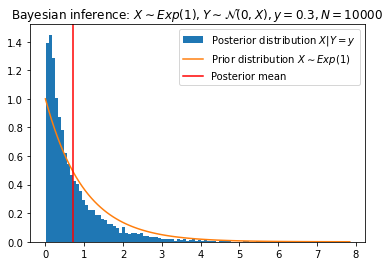

In [10]:
np.random.seed(2022)

N = 10000
y = 0.3

f = lambda x: 1/np.sqrt(x) * np.exp(-y**2/(2*x) - x) * (1 if x > 0 else 0)
gs = lambda: np.random.exponential(size=1)
g = lambda x: np.exp(-x)
c = 1/np.abs(y) * np.exp(-1/2)

x, T = ESR(N, f, gs, g, c)
print("Acceptance rate (Z):", round(N/T, 4))
print("Mean:", np.mean(x))
print("Variance:", np.var(x, ddof=1))

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True, label="Posterior distribution $X|Y=y$")
plt.plot(t, stats.expon.pdf(t), label=r"Prior distribution $X \sim Exp(1)$")
plt.axvline(x=np.mean(x), color="red", label="Posterior mean")
plt.legend()
plt.title("Bayesian inference: $X \sim Exp(1), Y \sim \mathcal{N}(0, X),$" + "$y = {0}, N = {1}$".format(y, N))
#plt.savefig("Bayes_1.pdf", bbox_inches="tight")
plt.show()

Acceptance rate (Z): 0.3458
Mean: 1.951797830036798
Variance: 1.2603030367570411


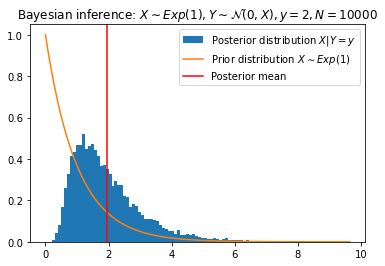

In [11]:
np.random.seed(2022)

N = 10000
y = 2

f = lambda x: 1/np.sqrt(x) * np.exp(-y**2/(2*x) - x) * (1 if x > 0 else 0)
gs = lambda: np.random.exponential(size=1)
g = lambda x: np.exp(-x)
c = 1/np.abs(y) * np.exp(-1/2)

x, T = ESR(N, f, gs, g, c)
print("Acceptance rate (Z):", round(N/T, 4))
print("Mean:", np.mean(x))
print("Variance:", np.var(x, ddof=1))

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True, label="Posterior distribution $X|Y=y$")
plt.plot(t, stats.expon.pdf(t), label=r"Prior distribution $X \sim Exp(1)$")
plt.axvline(x=np.mean(x), color="red", label="Posterior mean")
plt.legend()
plt.title("Bayesian inference: $X \sim Exp(1), Y \sim \mathcal{N}(0, X),$" + "$y = {0}, N = {1}$".format(y, N))
#plt.savefig("Bayes_2.pdf", bbox_inches="tight")
plt.show()

## Ước lượng Monte Carlo

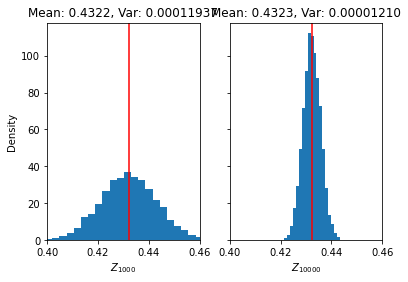

In [12]:
def MC_estimator_sinX2(N):
    X = np.random.normal(size=N)
    Y = np.sin(X)**2
    return np.mean(Y)
    
np.random.seed(2022)

MC_est1 = np.fromiter((MC_estimator_sinX2(1000) for _ in range(5000)), dtype=float)
MC_est2 = np.fromiter((MC_estimator_sinX2(10000) for _ in range(5000)), dtype=float)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(MC_est1, density=True, bins=30)
ax1.axvline(x=np.mean(MC_est1), color="red")
ax1.set_xlim(0.4, 0.46)
ax1.set_title("Mean: {0:.4f}, Var: {1:.8f}".format(np.mean(MC_est1), np.var(MC_est1, ddof=1)))
ax1.set_ylabel("Density")
ax1.set_xlabel("$Z_{1000}$")
ax2.hist(MC_est2, density=True, bins=20)
ax2.axvline(x=np.mean(MC_est2), color="red")
ax2.set_xlim(0.4, 0.46)
ax2.set_title("Mean: {0:.4f}, Var: {1:.8f}".format(np.mean(MC_est2), np.var(MC_est2, ddof=1)))
ax2.set_xlabel("$Z_{10000}$")
#plt.savefig("MC_error.pdf", bbox_inches="tight")
plt.show()

### Đánh giá chi tiết sai số

In [13]:
def MC_conf_int(Y, alpha=0.05):
    N = len(Y)
    Z_MC = np.mean(Y)
    qa = stats.t(N - 1).ppf(1 - alpha/2)
    sigma = np.std(Y, ddof=1)
    
    return Z_MC + sigma*qa/np.sqrt(N) * np.array([-1, 1])

In [14]:
# Minh họa mở đầu - Phương án 1
np.random.seed(2022)

N = 100
U = np.random.uniform(size=N)
X = -np.log(U)
Y = X**0.9

np.round(MC_conf_int(Y), 4)

array([0.8917, 1.3096])

In [15]:
# Minh họa mở đầu - Phương án 2
np.random.seed(2022)

N = 10
U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

np.round(MC_conf_int(Y), 4)

array([0.8367, 1.045 ])

In [16]:
# Minh họa mở đầu - Phương án 2
np.random.seed(2022)

N = 14000
U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

np.round(MC_conf_int(Y), 4)

array([0.9594, 0.9632])

## Các phương pháp giảm phương sai

### Lấy mẫu quan trọng

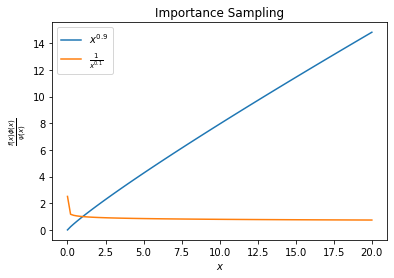

In [17]:
x = np.linspace(0.0001, 20, 100)

plt.plot(x, x**0.9, label="$x^{0.9}$")
plt.plot(x, 1/x**0.1, label=r"$\frac{1}{x^{0.1}}$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel(r"$\frac{f(x)\phi(x)}{\psi(x)}$")
plt.title("Importance Sampling")
#plt.savefig("IS_var_red.pdf", bbox_inches="tight")
plt.show()

### Biến đối nghịch

#### Ví dụ 1

In [18]:
N = 100000

X = np.random.normal(size=N)
X_prime = -X

Y_MC = np.logical_and(1 <= X, X <= 3).astype("float")
Y_MC_prime = np.logical_and(1 <= X_prime, X_prime <= 3).astype("float")
Y_AV = Y_MC + Y_MC_prime 

Z_MC = np.mean(Y_MC)
Z_AV = np.mean(Y_AV[:N//2])/2

eMSE_MC = np.var(Y_MC)/N
eMSE_AV = np.var(Y_AV[:N//2])/(2*N)

erho = np.corrcoef(Y_MC, Y_MC_prime)[0, 1]
p = stats.norm.cdf(3) - stats.norm.cdf(1)
rho = -p/(1 - p)

print(f"Z_MC: {Z_MC:.4f}, Z_AV: {Z_AV:.4f}")
print(f"rho: {rho:.4f}, estimated rho: {erho:.4f}")
print(f"MSE ratio: {1 + rho:.4f}, estimated MSE ratio: {eMSE_AV/eMSE_MC:.4f}, {(1 + erho):.4f}")

Z_MC: 0.1584, Z_AV: 0.1575
rho: -0.1867, estimated rho: -0.1869
MSE ratio: 0.8133, estimated MSE ratio: 0.8094, 0.8131


#### Ví dụ 2

In [19]:
N = 100000

U = np.random.uniform(size=N)
X = -np.log(U)
X_prime = -np.log(1 - U)

Y_MC = X**0.9
Y_MC_prime = X_prime**0.9
Y_AV = Y_MC + Y_MC_prime 

Z_MC = np.mean(Y_MC)
Z_AV = np.mean(Y_AV[:N//2])/2

eMSE_MC = np.var(Y_MC)/N
eMSE_AV = np.var(Y_AV[:N//2])/(2*N)

erho = np.corrcoef(Y_MC, Y_MC_prime)[0, 1]

print(f"Z_MC: {Z_MC:.4f}, Z_AV: {Z_AV:.4f}")
print(f"Estimated rho: {erho:.4f}")
print(f"Estimated MSE ratio: {eMSE_AV/eMSE_MC:.4f}, {(1 + erho):.4f}")

Z_MC: 0.9568, Z_AV: 0.9592
Estimated rho: -0.7114
Estimated MSE ratio: 0.2862, 0.2886


### Biến kiểm soát

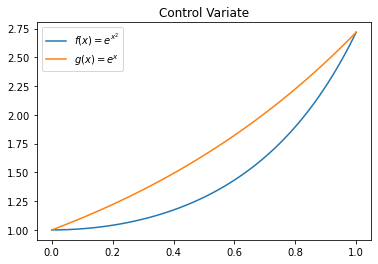

In [20]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x**2), label="$f(x) = e^{x^2}$")
plt.plot(x, np.exp(x), label="$g(x) = e^x$")
plt.legend()
plt.title("Control Variate")
#plt.savefig("CV_var_red.pdf", bbox_inches="tight")
plt.show()

In [21]:
N = 10000

X = np.random.uniform(size=N)
f_X = np.exp(X**2)
g_X = np.exp(X)
fg_X = f_X - g_X

Z_MC = np.mean(f_X)
Z_CV = np.mean(fg_X) + (np.exp(1) - 1)

print(f"Z_MC: {Z_MC:.4f}, Z_CV: {Z_CV:.4f}")
print(f"Estimated MSE ratio: {np.var(fg_X)/np.var(f_X):.4f}")

Z_MC: 1.4596, Z_CV: 1.4623
Estimated MSE ratio: 0.0622


## Một số ứng dụng cho suy diễn thống kê

### Ước lượng điểm

In [22]:
def bias_rho(N, n, rho):
    S = 0
    for _ in range(N):
        X = np.random.normal(size=n)
        Eta = np.random.normal(size=n)
        Y = rho*X + np.sqrt(1 - rho**2)*Eta
        S = S + stats.pearsonr(X, Y)[0]

    return (S/N - rho)

n = 10
N = 10000
rho = np.linspace(-1, 1, num=40) # num=40
bias = np.fromiter((bias_rho(N, n, r) for r in rho), float)

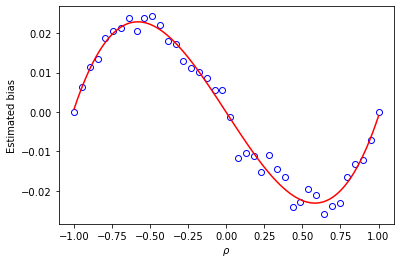

In [23]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(rho, bias)
spl_r = np.linspace(-1, 1, 100)

plt.plot(rho, bias, "bo", mfc="none")
plt.plot(spl_r, spl(spl_r), color="red")
plt.xlabel(r"$\rho$")
plt.ylabel("Estimated bias")
#plt.savefig("bias_rho_estimated.pdf", bbox_inches="tight")
plt.show()

### Khoảng tin cậy

In [ ]:
def confint_lambda(N, n, lam, alpha=0.05):
    k = 0
    for _ in range(N):
        X = np.random.poisson(lam, size=n)
        mu, sigma = np.mean(X), np.std(X, ddof=1)
        epsilon = stats.t.ppf(1-alpha/2, n - 1)*sigma/np.sqrt(n)
        U, V = mu - epsilon, mu + epsilon
        if U <= lam <= V:
            k = k + 1

    return (k/N)

n = 10
N = 10000
alpha = 0.05

lams = np.linspace(0.001, 1, num=40) # num=40
conf = np.fromiter((confint_lambda(N, n, lam, alpha) for lam in lams), float)

In [ ]:
plt.plot(lams, conf, "bo", mfc="none")
plt.axhline(y=1 - alpha, color="red")
plt.ylim(0, 1)
plt.xlabel(r"$\lambda$")
plt.ylabel("Confidence coefficient")
#plt.savefig("confint_lambda.pdf", bbox_inches="tight")
plt.show()

### Kiểm định giả thuyết

## Tài liệu

1. **Chapter 3.** Jochen Voss. *An Introduction to Statistical Computing - A Simulation-based Approach*. John Wiley \& Sons, 2014.

2. **Chapter 1, 5.** J. S. Dagpunar. *Simulation and Monte Carlo - With applications in finance and MCMC*. John Wiley \& Sons, 2007.